### Średni wiek małżeństwa kobiet w Polsce ###

        geo  TIME_PERIOD  OBS_VALUE
800  Poland         1993       23.0
801  Poland         1994       23.2


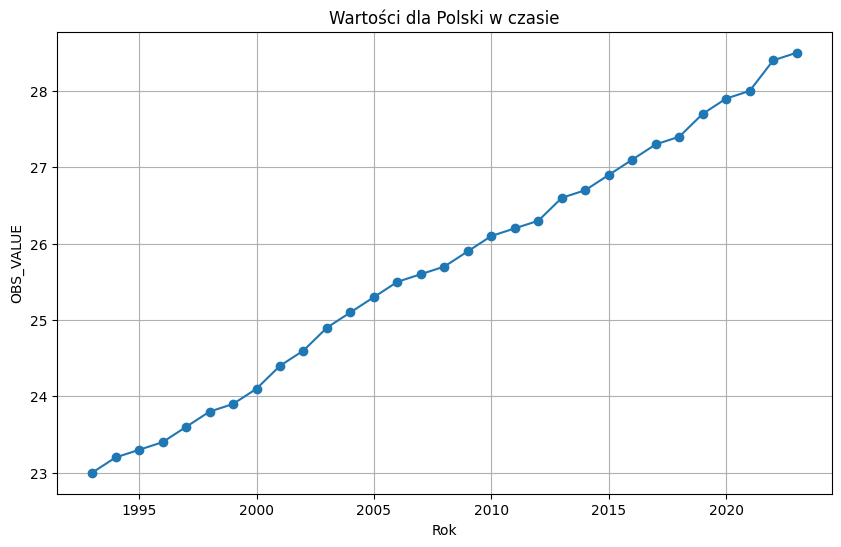

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('demo_nind_linear.csv')

poland = data[(data['geo'] == 'Poland') & (data['indic_de'] == 'Mean age at first marriage - females')]
poland = poland[['geo', 'TIME_PERIOD', 'OBS_VALUE']]

print(poland.head(2))

figure = plt.figure(figsize=(10, 6))
plt.plot(poland['TIME_PERIOD'], poland['OBS_VALUE'], marker='o')
plt.title('Wartości dla Polski w czasie')
plt.xlabel('Rok')
plt.ylabel('OBS_VALUE')
plt.grid()
plt.show()




24 31
[23.  23.2 23.3 23.4 23.6 23.8 23.9 24.1 24.4 24.6 24.9 25.1 25.3 25.5
 25.6 25.7 25.9 26.1 26.2 26.3 26.6 26.7 26.9 27.1] [27.3 27.4 27.7 27.9 28.  28.4 28.5]


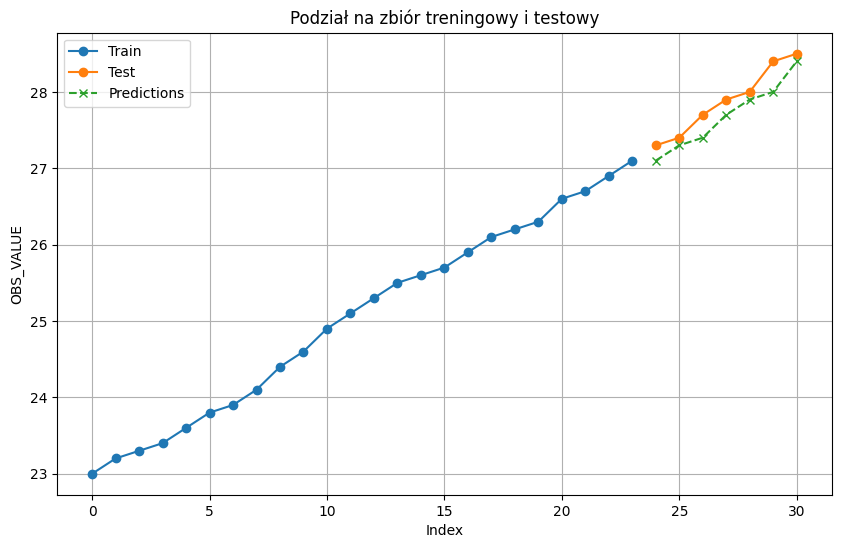

Mean Squared Error: 0.05142857142857127
Errors 0.22677868380553598


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

values = poland['OBS_VALUE'].values
# print(poland['OBS_VALUE'], values)


train_size = int(len(values) * 0.8)
print(train_size, len(values))
train, test = values[:train_size], values[train_size:]

print(train, test)

predictions = []
history = list(train)

for t in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    history.append(test[t])

    # 25 test 6 train

plt.figure(figsize=(10, 6))
plt.plot(range(len(train)), train, label='Train', marker='o')
plt.plot(range(len(train), len(train) + len(test)), test, label='Test', marker='o')
plt.plot(range(len(train), len(train) + len(test)), predictions, label='Predictions', linestyle='--', marker='x')
plt.title('Podział na zbiór treningowy i testowy')
plt.xlabel('Index')
plt.ylabel('OBS_VALUE')
plt.legend()
plt.grid()
plt.show()

mse = mean_squared_error(test, predictions)
print('Mean Squared Error:', mse)


print("Errors", np.sqrt(mse))

In [ ]:
# x = [2,2]
# y = [6,2]

# mse = mean_squared_error(x, y)
# mae = np.mean(np.abs(np.array(x) - np.array(y)))
# print('Mean Absolute Error:', mae)
# print('Mean Squared Error:', mse)
# print("Errors", np.sqrt(mse))

# print((np.pow(6-2,2) + np.pow(2-2,2)) / 2)




[23.  23.2 23.3 23.4 23.6 23.8 23.9 24.1 24.4 24.6 24.9 25.1 25.3 25.5
 25.6 25.7 25.9 26.1 26.2 26.3 26.6 26.7 26.9 27.1] [27.3 27.4 27.7 27.9 28.  28.4 28.5]


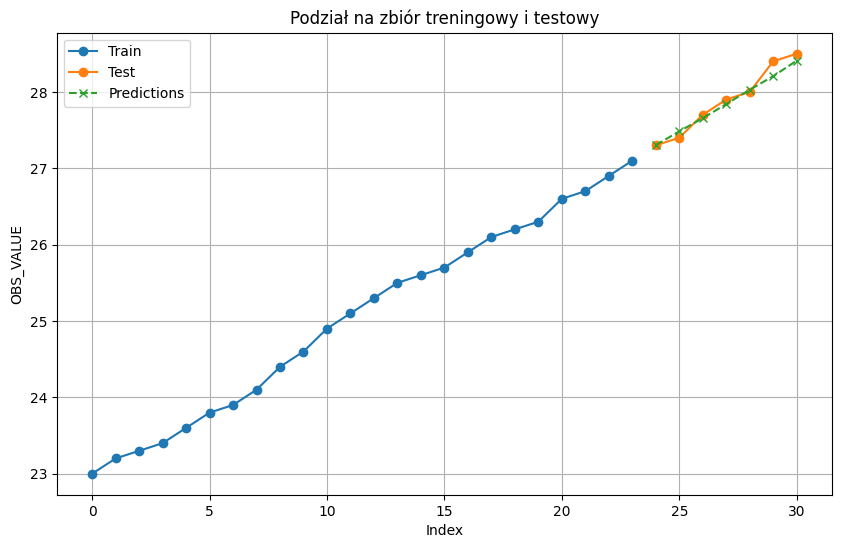

Mean Squared Error: 0.008463856059218679
Errors 0.09199921770981903


In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
values = poland['OBS_VALUE'].values
train_size = int(len(values) * 0.8)
train, test = values[:train_size], values[train_size:]

print(train, test)
    
predictions = []
history = list(train)
for t in range(len(test)):
    model = ExponentialSmoothing(history, trend='add', seasonal=None, initialization_method="estimated")
    model_fit = model.fit(
        smoothing_level=0.1,
        smoothing_trend=0.1,
        optimized=False
    )
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])

plt.figure(figsize=(10, 6))
plt.plot(range(len(train)), train, label='Train', marker='o')
plt.plot(range(len(train), len(train) + len(test)), test, label='Test', marker='o')
plt.plot(range(len(train), len(train) + len(test)), predictions, label='Predictions', linestyle='--', marker='x')
plt.title('Podział na zbiór treningowy i testowy')
plt.xlabel('Index')
plt.ylabel('OBS_VALUE')
plt.legend()
plt.grid()
plt.show()

mse = mean_squared_error(test, predictions)
print('Mean Squared Error:', mse)
print("Errors", np.sqrt(mse))

{'alpha': 0.3, 'beta': 0.7, 'type': 'mul', 'mse': 0.005793332396721991, 'rmse': np.float64(0.0761139435105158)}
[np.float64(27.237854608771922), np.float64(27.469614273004698), np.float64(27.64862697975778), np.float64(27.87637683251929), np.float64(28.10248615963102), np.float64(28.270574169283602), np.float64(28.53732867928305)] [np.float64(23.0), np.float64(23.2), np.float64(23.3), np.float64(23.4), np.float64(23.6), np.float64(23.8), np.float64(23.9), np.float64(24.1), np.float64(24.4), np.float64(24.6), np.float64(24.9), np.float64(25.1), np.float64(25.3), np.float64(25.5), np.float64(25.6), np.float64(25.7), np.float64(25.9), np.float64(26.1), np.float64(26.2), np.float64(26.3), np.float64(26.6), np.float64(26.7), np.float64(26.9), np.float64(27.1), np.float64(27.3), np.float64(27.4), np.float64(27.7), np.float64(27.9), np.float64(28.0), np.float64(28.4), np.float64(28.5)]


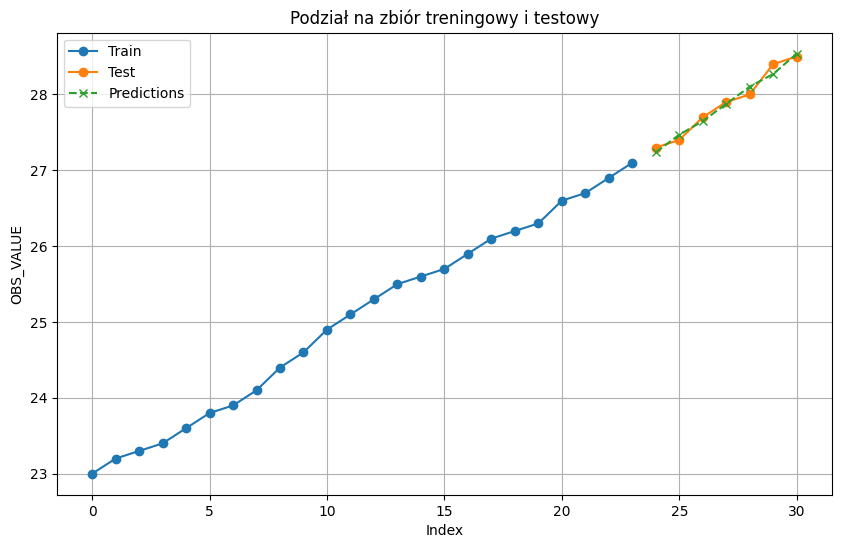

In [15]:
best_params = dict()


def adjust_params(alpha, beta, type):
    global best_params
    values = poland["OBS_VALUE"].values
    train_size = int(len(values) * 0.8)
    train, test = values[:train_size], values[train_size:]

    # print(train, test)

    predictions = []
    history = list(train)

    for t in range(len(test)):
        model = ExponentialSmoothing(
            history, trend=type, seasonal=None, initialization_method="estimated"
        )
        model_fit = model.fit(
            smoothing_level=alpha, smoothing_trend=beta, optimized=False
        )
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    mse = mean_squared_error(test, predictions)
    # print("Mean Squared Error:", mse)
    # print("Errors", np.sqrt(mse))
    rmse = np.sqrt(mse)

    key = f"{alpha}_{beta}_{type}"

    best_params[key] = {"alpha": alpha, "beta": beta, "type": type, "mse": mse, "rmse": rmse}

    return predictions, history


for i in range(0, 11):
    
    param_i = i/10
    
    for j in range (0,11):
        
        param_j = j/10

        for k in range(0, len(['add', 'mull'])):
        
            adjust_params(param_i, param_j, ['add', 'mul'][k])
    


# print(type(best_params))

best = best_params[next(iter(best_params))]

for key, value in best_params.items():
    if best['mse'] > value['mse']:
        best = value
    # print(value)

print(best)


predictions, history = adjust_params(best["alpha"], best['beta'], best['type'])


print(predictions, history)

plt.figure(figsize=(10, 6))
plt.plot(range(len(train)), train, label='Train', marker='o')
plt.plot(range(len(train), len(train) + len(test)), test, label='Test', marker='o')
plt.plot(range(len(train), len(train) + len(test)), predictions, label='Predictions', linestyle='--', marker='x')
plt.title('Podział na zbiór treningowy i testowy')
plt.xlabel('Index')
plt.ylabel('OBS_VALUE')
plt.legend()
plt.grid()
plt.show()


[28.74790274 28.97139954 29.1966339  29.4236193  29.65236938 29.88289784
 30.11521852 30.34934534 30.58529235 30.8230737  31.06270365 31.30419657
 31.54756695 31.79282938 32.03999857 32.28908934 32.54011664 32.79309551
 33.04804114 33.30496881 33.56389393 33.82483202 34.08779875 34.35280988
 34.6198813  34.88902904 35.16026922 35.43361813 35.70909216 35.98670782
 36.26648176 36.54843078 36.83257177 37.11892177 37.40749797 37.69831766
 37.9913983  38.28675745 38.58441283 38.8843823  39.18668384 39.49133558
 39.79835579 40.1077629  40.41957545 40.73381215 41.05049184 41.36963351
 41.69125631 42.01537952 42.34202259 42.6712051  43.00294679 43.33726757
 43.67418748 44.01372673 44.35590569 44.70074487 45.04826496 45.39848679
 45.75143138 46.1071199  46.46557366 46.82681418 47.19086312 47.5577423
 47.92747374 48.30007961 48.67558225 49.05400419 49.43536813 49.81969692
 50.20701363 50.59734148 50.99070389 51.38712444 51.78662691 52.18923526
 52.59497364 53.00386637 53.41593799 53.8312132  54.

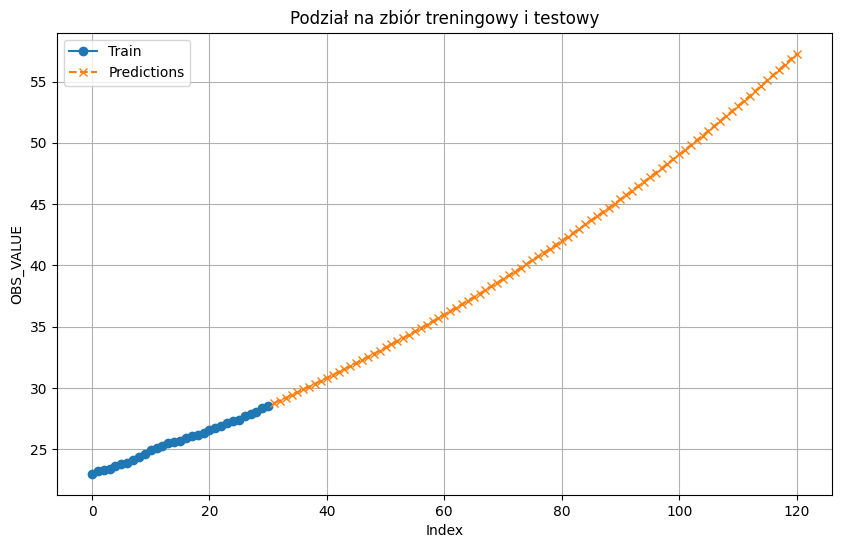

In [ ]:
train = poland["OBS_VALUE"].values

predictions = []
history = list(train)


model = ExponentialSmoothing(
    history, trend=best['type'], seasonal=None, initialization_method="estimated"
)
model_fit = model.fit(smoothing_level=best['alpha'], smoothing_trend=best['beta'], optimized=False)
yhat = model_fit.forecast(90)

print(yhat)

plt.figure(figsize=(10, 6))
plt.plot(range(len(train)), train, label='Train', marker='o')
plt.plot(range(len(train), len(train) + 90), yhat, label='Predictions', linestyle='--', marker='x')

plt.title('Podział na zbiór treningowy i testowy')
plt.xlabel('Index')
plt.ylabel('OBS_VALUE')
plt.legend()
plt.grid()
plt.show()
